## <center>Підготовка та аналіз даних</center>
## <center>Лабораторна робота №6</center>
#### <center>ФБ-25 Кравченко Максим</center>

Згенеруйте двовимірні дані $(x, y)$ за допомогою numpy.random : бажано, щоб розподіл точок був навколо деякої наперед заданої прямої ($y=kx+b$) для подальшого аналізу 
результатів

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

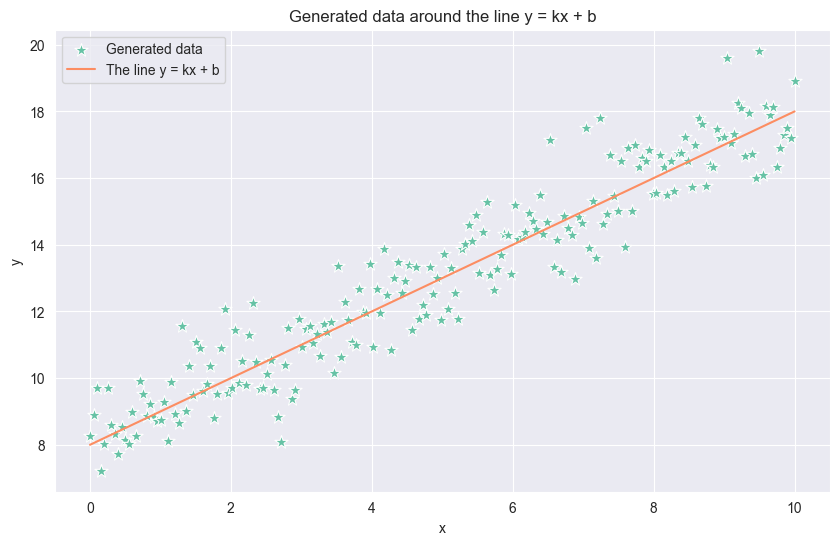

In [68]:
k = 1
b = 8
n = 200

x = np.linspace(0, 10, n)
noise = np.random.normal(0, 1, n)

y = k * x + b + noise
y_line_plot = k * x + b

sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))

sns.scatterplot(x=x, y=y, label='Generated data', marker='*', s=100, color=sns.color_palette("Set2")[0])
sns.lineplot(x=x, y=y_line_plot, label='The line y = kx + b', color=sns.color_palette("Set2")[1])
        
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Generated data around the line y = kx + b')
plt.show()

Напишіть функцію, яка реалізує метод найменших квадратів для пошуку оптимальних оцінок $\hat{k}$ та $\hat{b}$. <br>$L(\beta_{0},...,\beta_{n})=\frac{1}{n}\sum(Y_{i}-\hat{Y})^2$

Порівняйте знайдені параметри з оцінкою np.polyfit(x,y,1) (оцінка полінома степеню 1 методом найменших квадратів), та з початковими параметрами прямої (якщо такі є).

In [69]:
def least_squares_method(x, y):
    X = np.vstack([x, np.ones(len(x))]).T
    k, b = np.linalg.lstsq(X, y, rcond=None)[0]
    
    return k, b

def least_squares_method_form(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    
    k = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean) ** 2)
    b = y_mean - k * x_mean
    
    return k, b

In [70]:
k_squares, b_squares = least_squares_method(x, y)
k_polyfit, b_polyfit = np.polyfit(x, y, 1)


print(f"Original value k: {k}, b: {b}")
print(f"Estimated value of least squares method k: {k_squares}, b: {b_squares}")
print(f"Estimated value of numpy polyfit function k: {k_polyfit}, b: {b_polyfit}")

# k_squares_f, b_squares_f = least_squares_method_form(x, y)
# print(f"Estimated value of least squares method k: {k_squares_f}, b: {b_squares_f}")

Original value k: 1, b: 8
Estimated value of least squares method k: 0.9933588104404412, b: 8.126610057277064
Estimated value of numpy polyfit function k: 0.9933588104404405, b: 8.12661005727706


Відобразіть на графіку знайдені оцінки лінії регресії (вашої та numpy). Якщо ви генерували вхідні дані навколо лінії, відобразіть також її.

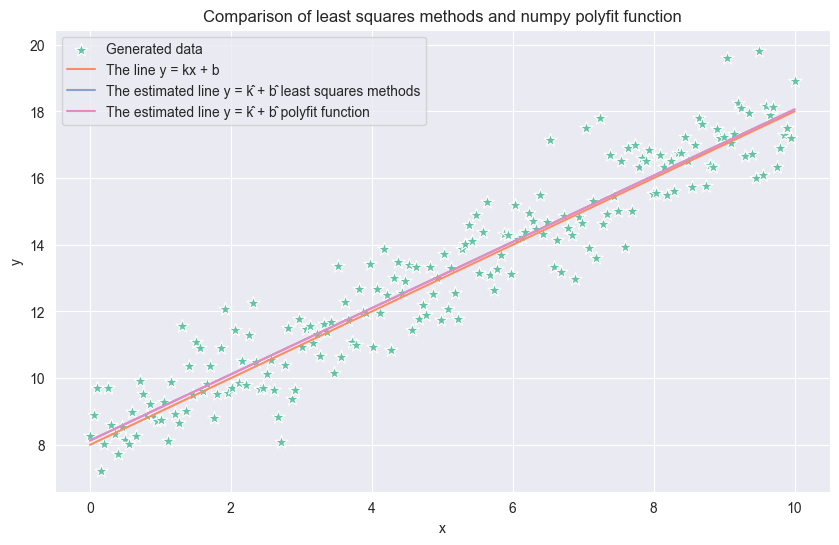

In [71]:
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))

sns.scatterplot(x=x, y=y, label='Generated data', marker='*', s=100, color=sns.color_palette("Set2")[0])
sns.lineplot(x=x, y=y_line_plot, label='The line y = kx + b', color=sns.color_palette("Set2")[1])
sns.lineplot(x=x, y=k_squares * x + b_squares, label='The estimated line y = k̂ + b̂ least squares methods', color=sns.color_palette("Set2")[2])
sns.lineplot(x=x, y=k_polyfit * x + b_polyfit, label='The estimated line y = k̂ + b̂ polyfit function', color=sns.color_palette("Set2")[3])
        
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Comparison of least squares methods and numpy polyfit function')
plt.show()

# Завдання 2

Напишіть функцію, яка реалізує метод градієнтного спуску для пошуку оптимальних 
оцінок $\hat{k}$ та $\hat{b}$. Визначіть оптимальні вхідні параметри: learning_rate, n_iter

In [72]:
def gradient_descent(x, y, learning_rate=0.01, n_iter=1000, review=0.0001):
    k = 0
    b = 0
    n = len(x)
    mistakes = []

    for i in range(n_iter):
        y_pred = k * x + b
        mistake = y_pred - y
        mean_mistake = (1 / n) * np.sum(mistake ** 2)
        mistakes.append(mean_mistake)
        k_gradient = (2 / n) * np.dot(mistake, x)
        b_gradient = (2 / n) * np.sum(mistake)
        k -= learning_rate * k_gradient
        b -= learning_rate * b_gradient

        if i > 0 and abs(mistakes[-1] - mistakes[-2]) < review:
            print(f"Gradient descent stopped at iteration {i} due to minimal mistake change")
            break

    return k, b, mistakes

learning_rate = 0.01
n_iteration = 1000
k_gd, b_gd, mistakes = gradient_descent(x, y, learning_rate, n_iteration)

# print(mistakes)
print(f"The estimated value (gradient_descent) k: {k_gd}, b: {b_gd}")

Gradient descent stopped at iteration 742 due to minimal mistake change
The estimated value (gradient_descent) k: 1.0233283254568077, b: 7.92778773193766


Додайте отриману лінію регресії на загальний графік

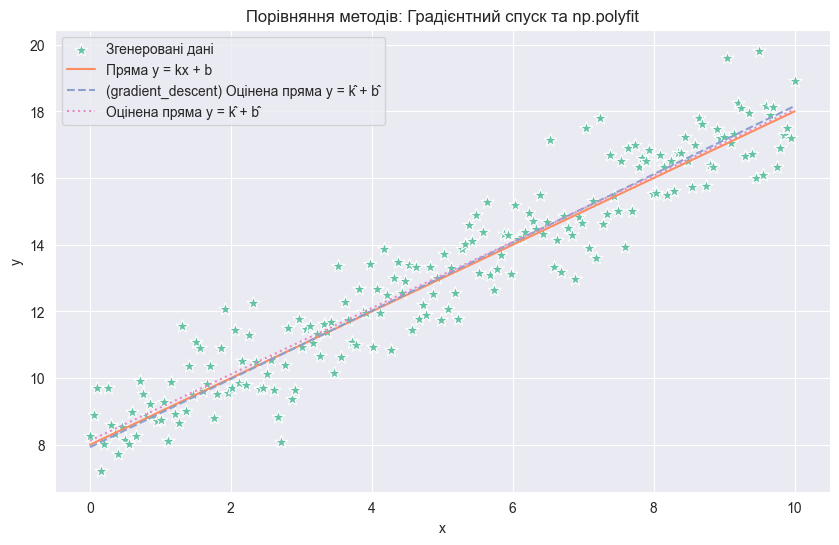

In [73]:
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))

sns.scatterplot(x=x, y=y, label='Згенеровані дані', marker='*', s=100, color=sns.color_palette("Set2")[0])
sns.lineplot(x=x, y=y_line_plot, label='Пряма y = kx + b', color=sns.color_palette("Set2")[1])
sns.lineplot(x=x, y=k_gd * x + b_gd, label='(gradient_descent) Оцінена пряма y = k̂ + b̂', color=sns.color_palette("Set2")[2], linestyle='dashed')
sns.lineplot(x=x, y=k_polyfit * x + b_polyfit, label='Оцінена пряма y = k̂ + b̂', color=sns.color_palette("Set2")[3], linestyle='dotted')
        
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Порівняння методів: Градієнтний спуск та np.polyfit')
plt.show()

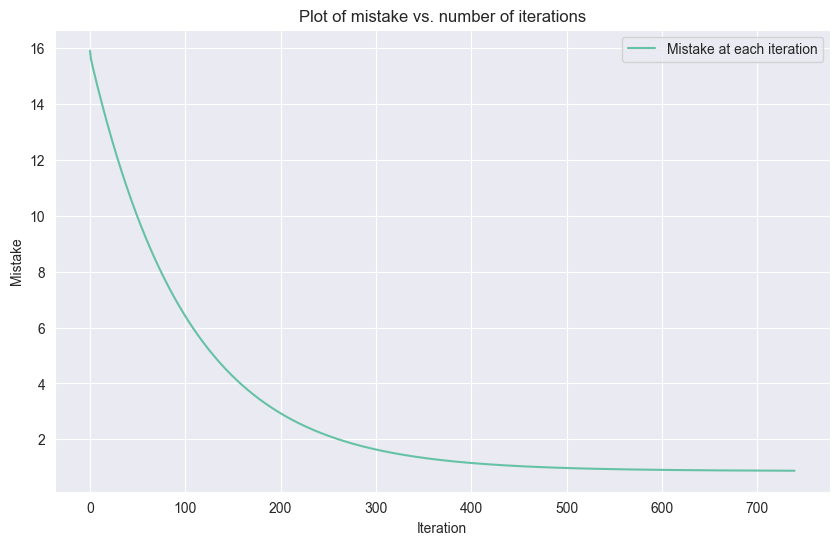

In [74]:
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))

sns.lineplot(x=range(len(mistakes[3:])), y=mistakes[3:], label='Mistake at each iteration', color=sns.color_palette("Set2")[0])

plt.xlabel('Iteration')
plt.ylabel('Mistake')
plt.legend()
plt.title('Plot of mistake vs. number of iterations')
plt.show()